In [20]:
from echidna import examine_transfers_for_sizes as esz
import polars as pl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

We examine an assumption we made during the estimation of the size of facilities earlier.
This was that all facilities existed at all times.
This is not True for all facilities.

In [3]:
esz.rough_hospital_size??

Signature: esz.rough_hospital_size(G: igraph.Graph, round_precision=16, clip_under=5)
Docstring: <no docstring>
Source:   
def rough_hospital_size(G: ig.Graph, round_precision=16, clip_under=5):
    PROP_READMIT = 0.42  # persons/admission
    CHURN_RATE = 1  # hospitals/day
    TIME_SCALE = 3652  # days
    return {
        loc: np.round(
            np.clip(sz / PROP_READMIT / TIME_SCALE / CHURN_RATE, clip_under, None),
            round_precision,
        )
        for loc, sz in determine_out_edges(G).items()
    }
File:      ~/.virtualenvs/monv/lib/python3.12/site-packages/echidna/examine_transfers_for_sizes.py
Type:      function

In [4]:
esz.nuanced_hospital_size??

Signature:
esz.nuanced_hospital_size(
    G: igraph.Graph,
    round_precision=16,
    clip_under=5,
)
Docstring: <no docstring>
Source:   
def nuanced_hospital_size(G: ig.Graph, round_precision=16, clip_under=5):
    PROP_READMIT = 0.42
    CHURN_RATE = 1
    existence = determine_existence_duration(G)
    return {
        loc: np.round(
            np.clip(sz / PROP_READMIT / existence[loc] / CHURN_RATE, clip_under, None),
            round_precision
        )
        for loc, sz in determine_out_edges(G).items()
    }
File:      ~/.virtualenvs/monv/lib/python3.12/site-packages/echidna/examine_transfers_for_sizes.py
Type:      function

The difference here is that for the more nuanced estaimtion, we use the actual duration of existence of the facility.

We have exported these to different size files, since the computation takes some amount of time

In [6]:
new_df = pl.read_csv("../data/concordant_networks/size_14_nu.csv")
old_df = pl.read_csv("../data/concordant_networks/size_14.csv")

In [7]:
sizes = (
    new_df.join(old_df, on='hospital')
    .with_columns(diff = pl.col('size') - pl.col('estimated_size'))
    .with_columns(diff_prop = pl.col('diff') / pl.col('estimated_size'))
)

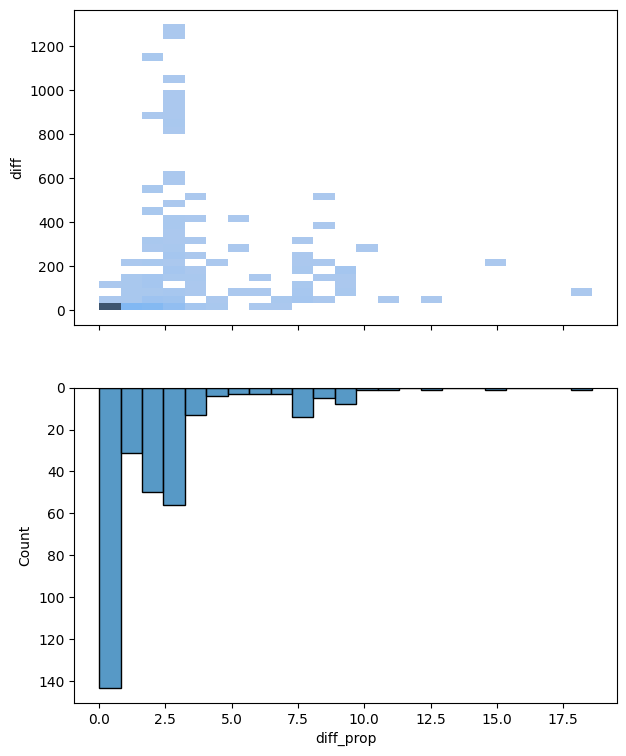

In [19]:
f, axs = plt.subplots(nrows=2, sharex=True, figsize=[7, 9])
sns.histplot(sizes, x='diff_prop', y='diff', ax=axs[0])
sns.histplot(sizes, x='diff_prop', ax=axs[1])
axs[1].invert_yaxis()